<a href="https://colab.research.google.com/github/CeeYip/ISYS5002_2023.S1_the_calculator_walkthrough/blob/main/Assignment_BeeGeez's_Sales_Zijun_Ye_21270428.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BeeGeez Sales Dataset Analysis**



#**Problem Statement**

* Total revenue and total profit over time
Analyse the total revenue and total profit over time by computing the yearly revenues and profits. Visualisation: Create a time series line chart with the x-axis representing years and the y-axis representing the revenue and profit amount.


* Total revenue and profit generated by Product
Analyse the total revenue and profit generated by each item type and then visualise the results sorted in descending order.

* Total revenue and profit generated by Sales Channel
Analyse the total profit and revenue data for Online and Offline sales channels separately by plotting line graphs for each channel.

# **Step 1: Identify the problem and requirements clearly**

1.   Input given sales data, including regions, product types, sales channels, revenue and profit information 
2.   Set up the connection between BeeGeez sales data and SQLite database with SQLite3 Library
3.   Develop visualization by charts for a comprehensive view of sales activities
4.   Analyze the results and give the discussions and suggestions for the further business strategies



# **Step 2: Describe inputs and outputs**

Inputs

Necessary library for data analysis.

BeeGeez sales dataset via .db file

Information as sales amount, product types, sales channels, revenues, regions, etc.


Outputs

Menu to display available operations

Result of connecting the dataset

Information of various sales data

Visualization of data

**Establish suitable environment for data analysis with SQLite3 and Pandas Library**

Connect and extract information from sales database

In [2]:
#Set up the environment
#import SQlite3 library

import sqlite3 as sq

In [7]:
# Creat a connection with database
conn = sq.connect('beegeez_sales_data_sqlite3.db')

# Create a cursor object to execute sql query, reture value from table
cur = conn.cursor()

# Select the table
sql = """
SELECT name FROM sqlite_master WHERE type='table';
"""

# Execute query and commit transaction

cur.execute(sql)
cur.fetchall()

[('sales',)]

In [8]:
# Get details from the table
sql='''
PRAGMA table_info('sales');
'''
cur.execute(sql)
cur.fetchall()

[(0, 'Region', 'TEXT', 0, None, 0),
 (1, 'Country', 'TEXT', 0, None, 0),
 (2, 'Item_Type', 'TEXT', 0, None, 0),
 (3, 'Sales_Channel', 'TEXT', 0, None, 0),
 (4, 'Order_Priority', 'TEXT', 0, None, 0),
 (5, 'Order_Date', 'DATE', 0, None, 0),
 (6, 'Order_ID', 'INTEGER', 0, None, 0),
 (7, 'Ship_Date', 'DATE', 0, None, 0),
 (8, 'Units_Sold', 'INTEGER', 0, None, 0),
 (9, 'Unit_Price', 'REAL', 0, None, 0),
 (10, 'Unit_Cost', 'REAL', 0, None, 0),
 (11, 'Total_Revenue', 'REAL', 0, None, 0),
 (12, 'Total_Cost', 'REAL', 0, None, 0),
 (13, 'Total_Profit', 'REAL', 0, None, 0)]

In [9]:
# Use pandas library to read the database
import pandas as pd

sql='''
SELECT * from sales;
'''
# Load the data into a DataFrame
users_df = pd.read_sql_query(sql, conn)
users_df

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,512878119,2011-09-03,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,2011-12-28,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,728815257,2016-06-29,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02


# **Step 3: Work the problems by hand**


List the total yearly revenue and profit and visualise the trend.

Extract the data manually with manipulation approaches such as filtering, grouping, and aggregation. 


Grouping: 

Group the data from item type and summarize their total revenue:

|  Product type|   Total Revenue (million) |
|-----------|------------|
| Cosmetics| 10|
| Household	 |7 |
| Office Supplies | 4.5|


Filtering: 

Filter the targeted data we need, such as revenue and profit of online channel in various region:

|Region|Channel| Total Revenue (million)  |Total Profit (million) |
|-----------|------------|-----------|----------|
|Asia|Offline|10|5
|Euro|Offline|8|5
|Austrilia|Online|3|1.5
|America|Online|7|4	
|Africa|Offline|0.5|0.1	





Aggregation: 

Count the values as each region. For example, calculate the total revenue and average profit for each region.

|  Region|   Total Revenue (million)  |
|-----------|------------|
|Asia|5|
|Euro|5|
|Austrilia|1.5
|America|4	
|Africa|0.1	

**After connection and read the database, we continue to further focus on sorting out the data.**

**Extract "Aisa" data**

In [10]:
# Extract relevant information from the tables in the database
sql = "SELECT * FROM sales WHERE Region = 'Asia'"
cur.execute(sql)
region_asia = cur.fetchmany(3)
print(region_asia)

[('Asia', 'Kyrgyzstan', 'Vegetables', 'Online', 'H', '2011-06-24', 814711606, '2011-07-12', 124, 154.06, 90.93, 19103.44, 11275.32, 7828.12), ('Asia', 'Bangladesh', 'Clothes', 'Online', 'L', '2017-01-13', 187310731, '2017-03-01', 8263, 109.28, 35.84, 902980.64, 296145.92, 606834.72), ('Asia', 'Mongolia', 'Personal Care', 'Offline', 'C', '2014-02-19', 832401311, '2014-02-23', 4901, 81.73, 56.67, 400558.73, 277739.67, 122819.06)]


In [11]:
# Use Pandas to load the query results into data frames
sales_df = pd.read_sql_query(sql, conn)
sales_df

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit
0,Asia,Kyrgyzstan,Vegetables,Online,H,2011-06-24,814711606,2011-07-12,124,154.06,90.93,19103.44,11275.32,7828.12
1,Asia,Bangladesh,Clothes,Online,L,2017-01-13,187310731,2017-03-01,8263,109.28,35.84,902980.64,296145.92,606834.72
2,Asia,Mongolia,Personal Care,Offline,C,2014-02-19,832401311,2014-02-23,4901,81.73,56.67,400558.73,277739.67,122819.06
3,Asia,Sri Lanka,Cosmetics,Offline,M,2016-11-19,419123971,2016-12-18,6952,437.20,263.33,3039414.40,1830670.16,1208744.24
4,Asia,Turkmenistan,Household,Offline,L,2010-12-30,441619336,2011-01-20,3830,668.27,502.54,2559474.10,1924728.20,634745.90
5,Asia,Myanmar,Household,Offline,H,2015-01-16,177713572,2015-03-01,8250,668.27,502.54,5513227.50,4145955.00,1367272.50
6,Asia,Brunei,Office Supplies,Online,L,2012-04-01,320009267,2012-05-08,6708,651.21,524.96,4368316.68,3521431.68,846885.00
7,Asia,Myanmar,Clothes,Online,H,2015-11-14,223359620,2015-11-18,5930,109.28,35.84,648030.40,212531.20,435499.20
8,Asia,Turkmenistan,Office Supplies,Online,M,2013-04-23,462405812,2013-05-20,5010,651.21,524.96,3262562.10,2630049.60,632512.50
9,Asia,Laos,Vegetables,Offline,C,2011-09-15,789176547,2011-10-23,3732,154.06,90.93,574951.92,339350.76,235601.16


**Extract "Australia and Oceania" data**

**And filter valuable information**

In [12]:
# Extract relevant information from the tables in the database
sql = "SELECT * FROM sales WHERE Region = 'Australia and Oceania'"
cur.execute(sql)
region_ao = cur.fetchmany(3)
print(region_ao)

[('Australia and Oceania', 'Tuvalu', 'Baby Food', 'Offline', 'H', '2010-05-28', 669165933, '2010-06-27', 9925, 255.28, 159.42, 2533654.0, 1582243.5, 951410.5), ('Australia and Oceania', 'Solomon Islands', 'Baby Food', 'Online', 'C', '2015-02-04', 547995746, '2015-02-21', 2974, 255.28, 159.42, 759202.72, 474115.08, 285087.64), ('Australia and Oceania', 'East Timor', 'Meat', 'Online', 'L', '2012-07-31', 322067916, '2012-09-11', 5908, 421.89, 364.69, 2492526.12, 2154588.52, 337937.6)]


In [13]:
# Use Pandas to load the query results into data frames
sales_df = pd.read_sql_query(sql, conn)
sales_df

,Region,Country,Item_Type,Sales_Channel,Order_Priority,Order_Date,Order_ID,Ship_Date,Units_Sold,Unit_Price,Unit_Cost,Total_Revenue,Total_Cost,Total_Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Australia and Oceania,Solomon Islands,Baby Food,Online,C,2015-02-04,547995746,2015-02-21,2974,255.28,159.42,759202.72,474115.08,285087.64
2,Australia and Oceania,East Timor,Meat,Online,L,2012-07-31,322067916,2012-09-11,5908,421.89,364.69,2492526.12,2154588.52,337937.60
3,Australia and Oceania,New Zealand,Fruits,Online,H,2014-09-08,142278373,2014-10-04,2187,9.33,6.92,20404.71,15134.04,5270.67
4,Australia and Oceania,Kiribati,Fruits,Online,M,2014-10-13,347140347,2014-11-10,5398,9.33,6.92,50363.34,37354.16,13009.18
5,Australia and Oceania,Australia,Office Supplies,Online,C,2015-10-27,158535134,2015-11-25,2924,651.21,524.96,1904138.04,1534983.04,369155.00
6,Australia and Oceania,Fiji,Clothes,Offline,C,2010-06-30,647876489,2010-08-01,9905,109.28,35.84,1082418.40,354995.20,727423.20
7,Australia and Oceania,Australia,Cereal,Offline,H,2013-06-09,450563752,2013-07-02,682,205.70,117.11,140287.40,79869.02,60418.38
8,Australia and Oceania,Federated States of Micronesia,Beverages,Online,C,2014-10-28,217221009,2014-11-15,9379,47.45,31.79,445033.55,298158.41,146875.14
9,Australia and Oceania,Samoa,Cosmetics,Online,H,2013-07-20,670854651,2013-08-07,9654,437.20,263.33,4220728.80,2542187.82,1678540.98


# **Step 4: Develop an algorithm**

1.   Connect and get the database
2.   Filter relevant information
3.   Use matplotlib & seabone to visualize the data
4.   Analysis and give further suggestions



#**Step 5: Convert to Python language**

## Analysing and Visualising BeeGeez's Sales Dataset to Gain Valuable Insights

# Group A Q2: Total revenue and profit generated by Product
Analyse the total revenue and profit generated by each item type and then visualise the results sorted in descending order.

In [18]:
# Group the total revenue of regions
grouped_df = sales_df.groupby('Item_Type')['Total_Revenue'].sum()
grouped_df

Item_Type
Baby Food          3292856.72
Beverages           890541.60
Cereal              140287.40
Clothes            1082418.40
Cosmetics          4220728.80
Fruits               70768.05
Meat               2492526.12
Office Supplies    1904138.04
Name: Total_Revenue, dtype: float64

In [19]:
# Aggregate sold units with total revenue and item types
aggregated_df = sales_df.groupby(['Total_Revenue', 'Item_Type']).sum()
aggregated_df

<ipython-input-19-f8f477797135>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_df = sales_df.groupby(['Total_Revenue', 'Item_Type']).sum()


,,Order_ID,Units_Sold,Unit_Price,Unit_Cost,Total_Cost,Total_Profit
Total_Revenue,Item_Type,,,,,,
20404.71,Fruits,142278373,2187,9.33,6.92,15134.04,5270.67
50363.34,Fruits,347140347,5398,9.33,6.92,37354.16,13009.18
140287.40,Cereal,450563752,682,205.70,117.11,79869.02,60418.38
445033.55,Beverages,217221009,9379,47.45,31.79,298158.41,146875.14
445508.05,Beverages,240470397,9389,47.45,31.79,298476.31,147031.74
759202.72,Baby Food,547995746,2974,255.28,159.42,474115.08,285087.64
1082418.40,Clothes,647876489,9905,109.28,35.84,354995.20,727423.20
1904138.04,Office Supplies,158535134,2924,651.21,524.96,1534983.04,369155.00
2492526.12,Meat,322067916,5908,421.89,364.69,2154588.52,337937.60


In [20]:
# Extract relevant information from the tables in the database
# Filter the item type and total revenue from the sales data
sql = "SELECT Item_Type, Total_Revenue FROM sales"
# Sort the Total Revenue data in descending order
sorted_sales = sales_df.sort_values(by='Total_Revenue')
top_12_revenue = sorted_sales.head(12)
# Create the tabe
top_12_revenue = pd.read_sql_query(sql, conn)
top_12_revenue

,Item_Type,Total_Revenue
0,Baby Food,2533654.00
1,Cereal,576782.80
2,Office Supplies,1158502.59
3,Fruits,75591.66
4,Office Supplies,3296425.02
...,...,...
95,Clothes,97040.64
96,Fruits,58471.11
97,Vegetables,228779.10
98,Personal Care,471336.91


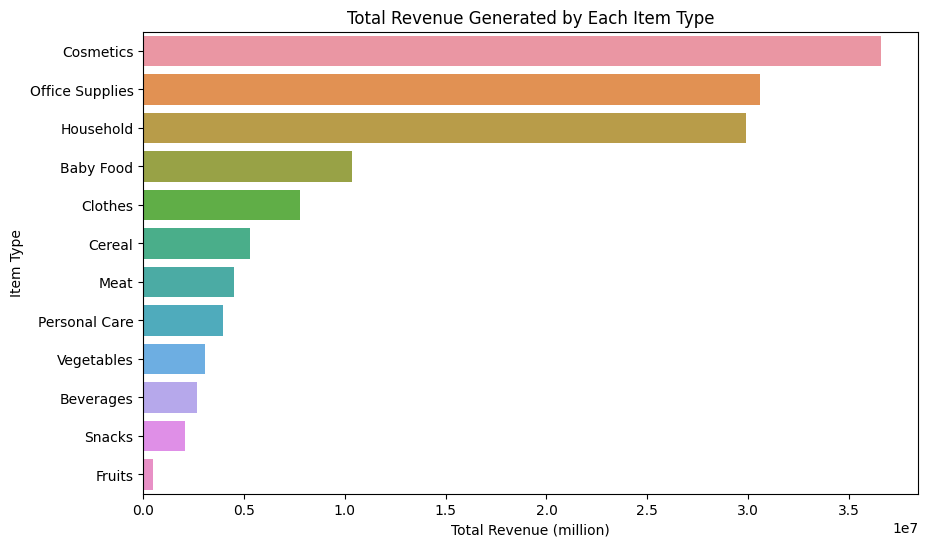

In [21]:
# Use SQLite3 to retrieve data from database
# Write query to calculate the total revenue and profit for each item type
sql = "SELECT Item_Type, SUM(Total_Revenue) AS Total_Revenue, SUM(Total_Profit) AS Total_Profit FROM sales GROUP BY Item_Type"
# Load the result into pandas dataframe
df = pd.read_sql_query(sql, conn)

# Total Revenue Generated
# sort the data in descending 
sorted_df = df.sort_values(by='Total_Revenue', ascending=False)
# Create a visualize chart
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Revenue', y='Item_Type', data=sorted_df)
plt.xlabel('Total Revenue (million)')
plt.ylabel('Item Type')
plt.title('Total Revenue Generated by Each Item Type')
plt.show()


In [22]:
# Extract relevant information from the tables in the database
# Filter the item type and total revenue from the sales data
sql = "SELECT Item_Type, Total_Profit FROM sales"
# Sort the Total Revenue data in descending order
sorted_sales = sales_df.sort_values(by='Item_Type')
top_12_profit = sorted_sales.head(12)
# Create the tabe
top_12_profit = pd.read_sql_query(sql, conn)
top_12_profit

,Item_Type,Total_Profit
0,Baby Food,951410.50
1,Cereal,248406.36
2,Office Supplies,224598.75
3,Fruits,19525.82
4,Office Supplies,639077.50
...,...,...
95,Clothes,65214.72
96,Fruits,15103.47
97,Vegetables,93748.05
98,Personal Care,144521.02


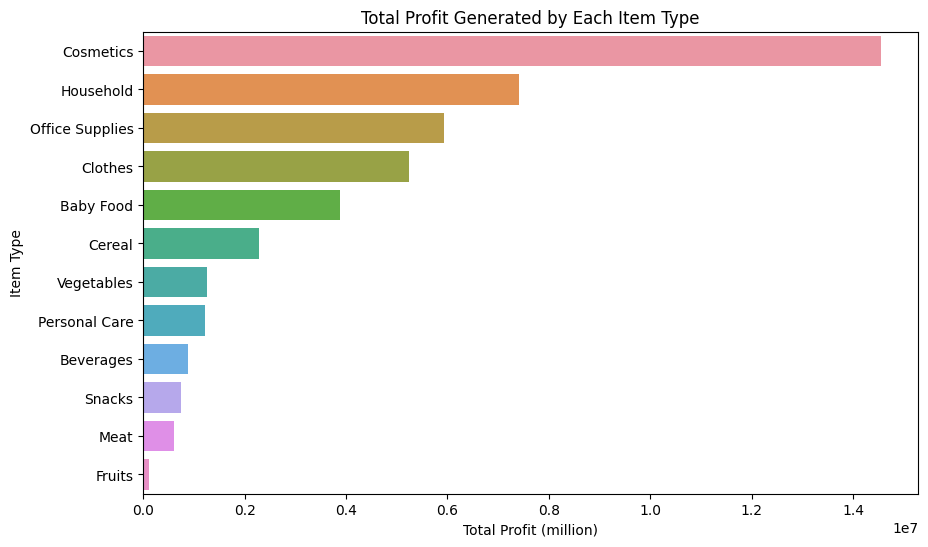

In [23]:
# Sort the data in descending with total profit
sorted_df = df.sort_values(by='Total_Profit', ascending=False)
# Create a visualize chart
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Profit', y='Item_Type', data=sorted_df)
plt.xlabel('Total Profit (million)')
plt.ylabel('Item Type')
plt.title('Total Profit Generated by Each Item Type')
plt.show()


**Discussion**

According to the chart, the most valuable products are cosmetics, Household and Office Supplies which contribute more than a half of revenue and profit.

For the further development, the product of these kinds can be invested as long-term key investments to remain revenue for operation.

In the other hand, Fruits, Snacks, Meat, Beverages show a weak ability of revenue and profit,  suggesting that investment on food should be adjust, release more fund to other profitable product, to increase cash flow of organization.

# Group A Q1: Total revenue and total profit over time

Analyse the total revenue and total profit over time by computing the yearly revenues and profits.

Visualisation: Create a time series line chart with the x-axis representing years and the y-axis
representing the revenue and profit amount.

In [24]:
# Extract relevant information from the tables in the database
# Filter the total profit and total revenue from the sales data
sql = "SELECT Total_Revenue, Total_Profit, Order_Date FROM sales"
# Sort the Total Revenue data in descending order
sorted_sales = sales_df.sort_values(by='Total_Revenue')
sale_revenue = sorted_sales.head(10)
# Create the tabe
sale_revenue = pd.read_sql_query(sql, conn)
sale_revenue

,Total_Revenue,Total_Profit,Order_Date
0,2533654.00,951410.50,2010-05-28
1,576782.80,248406.36,2012-08-22
2,1158502.59,224598.75,2014-05-02
3,75591.66,19525.82,2014-06-20
4,3296425.02,639077.50,2013-02-01
...,...,...,...
95,97040.64,65214.72,2011-07-26
96,58471.11,15103.47,2011-11-11
97,228779.10,93748.05,2016-06-01
98,471336.91,144521.02,2015-07-30


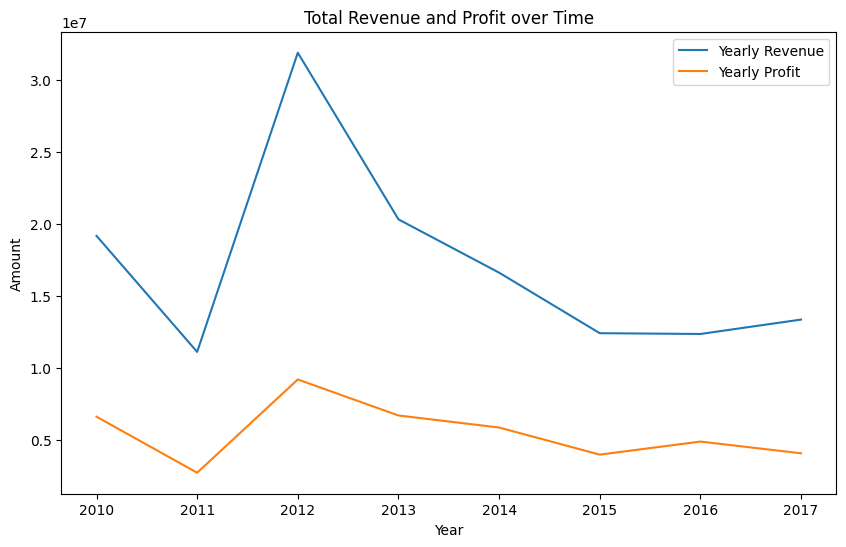

In [25]:
# Extract the year from the order date column
users_df['Order_Date'] = pd.to_datetime(users_df['Order_Date'])
users_df['Year'] = users_df['Order_Date'].dt.year

# Group the data by year and calculate the sum of total revenue and total profit
yearly_revenue = users_df.groupby('Year')['Total_Revenue'].sum()
yearly_profit = users_df.groupby('Year')['Total_Profit'].sum()

# Create a time line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_revenue.index, yearly_revenue.values, label='Yearly Revenue')
plt.plot(yearly_profit.index, yearly_profit.values, label='Yearly Profit')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Total Revenue and Profit over Time')
plt.legend()
plt.show()


**Discussion**
It can be seen that the revenue margin remain in a scope of 1.0 over time, exclude 2011 - 2012, even a significant increase of revenue, capability of profit still keep low.

After 2012, trend of revenue and profit is flattening to average level.

# Group B Q1: Total revenue and profit generated by Sales Channel

Analyse the total profit and revenue data for Online and Offline sales channels
separately by plotting line graphs for each channel. 

In [26]:
# Extract relevant information from the tables in the database
# Filter the total profit and total revenue by online channel from the sales data
sql = "SELECT Total_Revenue, Total_Profit, Order_Date FROM sales WHERE Sales_Channel = 'Online'"
# Sort the Total Revenue data in descending order
sorted_sales = sales_df.sort_values(by='Total_Revenue')
sale_online = sorted_sales.head(10)
# Create the tabe
sale_online = pd.read_sql_query(sql, conn)
sale_online

,Total_Revenue,Total_Profit,Order_Date
0,576782.80,248406.36,2012-08-22
1,75591.66,19525.82,2014-06-20
2,759202.72,285087.64,2015-02-04
3,1245112.92,510216.66,2012-07-17
4,1356180.10,584073.87,2014-04-18
5,19103.44,7828.12,2011-06-24
6,902980.64,606834.72,2017-01-13
7,182825.44,122865.12,2012-04-23
8,2492526.12,337937.60,2012-07-31
9,1901836.00,714157.00,2014-05-14


In [27]:
# Extract relevant information from the tables in the database
# Filter the total profit and total revenue by offline channel from the sales data
sql = "SELECT Total_Revenue, Total_Profit, Order_Date FROM sales WHERE Sales_Channel = 'Offline'"
# Sort the Total Revenue data in descending order
sorted_sales = sales_df.sort_values(by='Total_Revenue')
sale_offline = sorted_sales.head(10)
# Create the tabe
sale_offline = pd.read_sql_query(sql, conn)
sale_offline

,Total_Revenue,Total_Profit,Order_Date
0,2533654.00,951410.50,2010-05-28
1,1158502.59,224598.75,2014-05-02
2,3296425.02,639077.50,2013-02-01
3,2798046.49,693911.51,2011-04-23
4,496101.10,152114.20,2015-07-14
5,455479.04,306097.92,2014-08-02
6,5997054.98,1487261.02,2017-02-08
7,400558.73,122819.06,2014-02-19
8,3039414.40,1208744.24,2016-11-19
9,257653.50,85033.80,2015-04-01


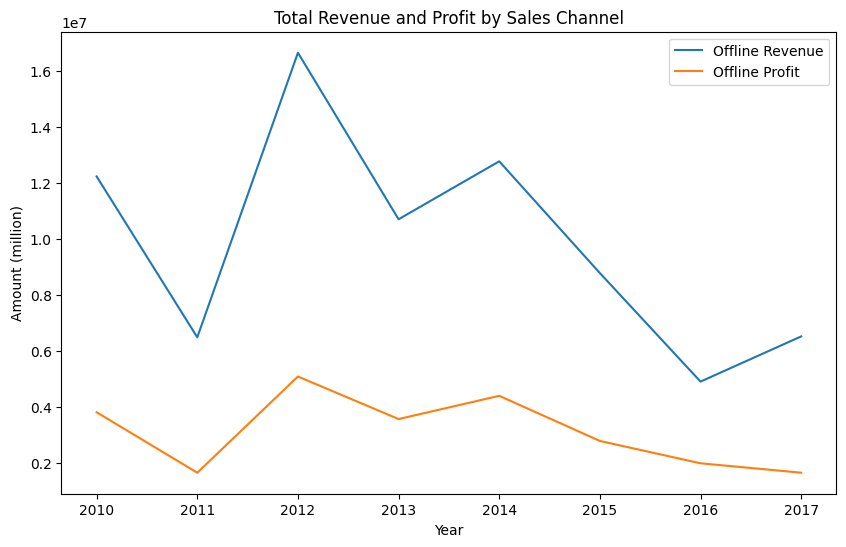

In [28]:
# Filter the data for Online sales channel
online_data = users_df[users_df['Sales_Channel'] == 'Online']

# Filter the data for Offline sales channel
offline_data = users_df[users_df['Sales_Channel'] == 'Offline']

# Group the online and offline data by year and calculate the sum of total revenue and total profit
online_yearly_revenue = online_data.groupby('Year')['Total_Revenue'].sum()
online_yearly_profit = online_data.groupby('Year')['Total_Profit'].sum()
offline_yearly_revenue = offline_data.groupby('Year')['Total_Revenue'].sum()
offline_yearly_profit = offline_data.groupby('Year')['Total_Profit'].sum()

# Create line graphs for each sales channel
plt.figure(figsize=(10, 6))

plt.plot(offline_yearly_revenue.index, offline_yearly_revenue.values, label='Offline Revenue')
plt.plot(offline_yearly_profit.index, offline_yearly_profit.values, label='Offline Profit')
plt.xlabel('Year')
plt.ylabel('Amount (million)')
plt.title('Total Revenue and Profit by Sales Channel')
plt.legend()
plt.show()


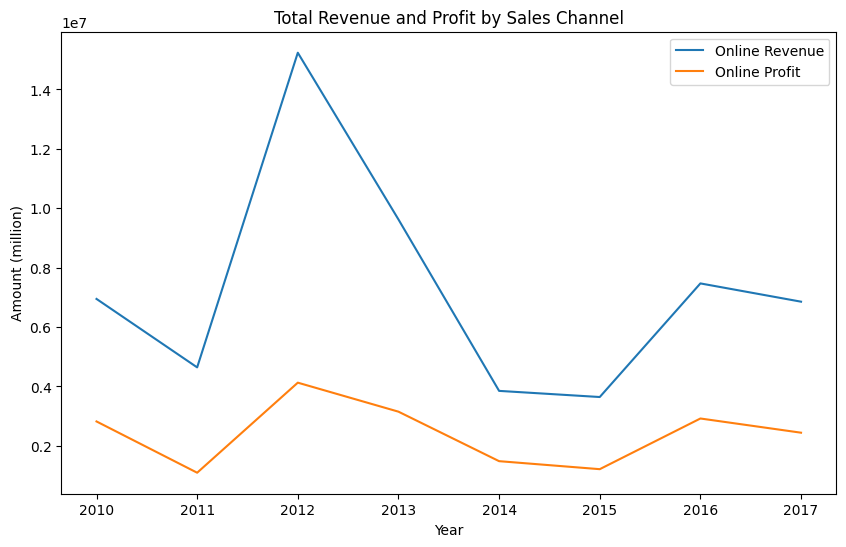

In [29]:
# Create line graphs for each sales channel
plt.figure(figsize=(10, 6))
plt.plot(online_yearly_revenue.index, online_yearly_revenue.values, label='Online Revenue')
plt.plot(online_yearly_profit.index, online_yearly_profit.values, label='Online Profit')

plt.xlabel('Year')
plt.ylabel('Amount (million)')
plt.title('Total Revenue and Profit by Sales Channel')
plt.legend()
plt.show()

**Interpretation and Conclusion**

Summarise the main insights you have gained from the data analysis.

Discuss any limitations of your analysis and suggest possible improvements.

Reflect on the usability and effectiveness of Python notebooks



Main insights

From this data analysis, we can see that the online revenue had a significant increase since 2011 and reach the peak at 2012. But it droped back to average in 2 years by 2014.

Similar with offline revenue, downtrend stoped at 1.1 billion in 2013 and raised again in the next year.
For both online and offline, profit seem remain in a low average even there are couple of peaks in the duration.

For the profitable product, cosmetics contribute the most proportion by over 1.4 billion.

Limitations

With the analysis above, the modules and methods used can't meet the overview of the database, it may conduct potential biases for the final decision.
It should be considered to further improve understanding of data analysis methods and identifying limitations, and benefit to increase visualization methods for analysis, which provide a broader aspects of dataset, to establish multiple visual angles for it.

Reflection

For the study of python, it is the first time I access in data manipulation capabilities, it is showing a new usability with scalability.

By using python to handle big scale dataset, an ease of code writing is necessary for me to improve my capability.

Further, creating visualization can be provide effectiveness for business analysis, not only for profit calculation but also benefit for decision-making.